In [1]:
from convex_func import convex_func_lin,convex_func_smooth
import matplotlib.pyplot as plt
import numpy as np
import math
from GH_capacities_convex import GH_capacities_convex

In [2]:
x=np.arange(0,1,0.0001)
len(x) # taking 10000 points on interval [0,1]
n_iter=300

# Convex Toric Domains

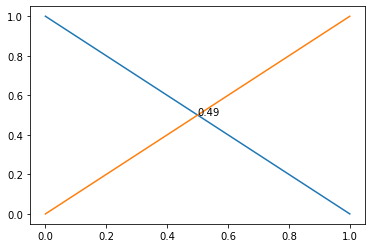

In [3]:
# ellipsoid case
f_ell=[convex_func_lin(x,[0.2],[0.8]) for x in x]
plt.plot(x,f_ell)
plt.plot(x,x)
idx = np.argwhere(np.diff(np.sign(f_ell - x))).flatten()[0]
plt.annotate('%.4s' %x[idx], xy=(x[idx], f_ell[idx]))

plt.show()

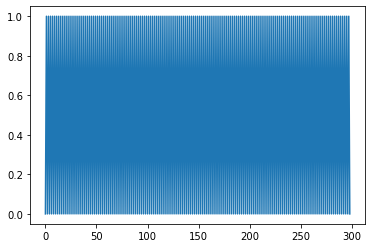

In [4]:
# computing Gutt-Hutchings capacities for ellipsoid
ghc=GH_capacities_convex(n_iter,x,f_ell)
# computing "spectral gap" consecutive gaps
diff=[ghc[i]-ghc[i-1] for i in range(1,len(ghc))]
plt.plot(range(len(diff)),diff)

We observe there is subsequence for which the "spectral gap" is zero, these are iterations when the Reeb flow is identity. 

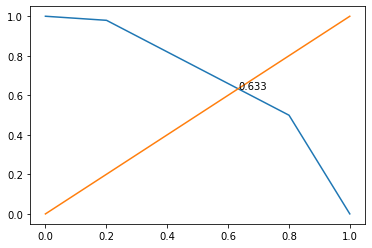

In [5]:
# piece-wise linear convex function
f=[convex_func_lin(x,[0.2,0.8],[0.98,0.5]) for x in x]
plt.plot(x,f)
plt.plot(x,x)
idx = np.argwhere(np.diff(np.sign(f - x))).flatten()[0]
plt.annotate('%.5s' %x[idx], xy=(x[idx], f[idx]))

plt.show()

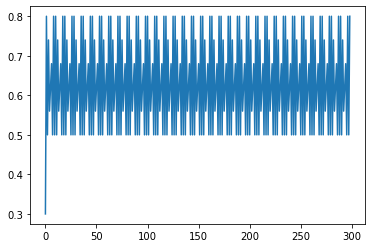

In [6]:
#computing Gutt-Hutchings capacity piece-wise linear convex function
ghc=GH_capacities_convex(n_iter,x,f)
diff=[ghc[i]-ghc[i-1] for i in range(1,len(ghc))]
plt.plot(range(len(diff)),diff)

The consecutive differences "spectral gap" of capacities between 0.5 and 0.9.

As proved by Gutt-Hutchings, the $c_k/k$ converges to the cube capacity. The cube capacity is the fixed point $x_0$ such that $f(x_0)=x_0$.


0.6361204013377926

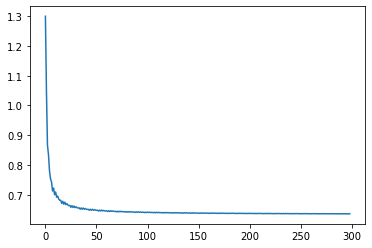

In [7]:
cube_cap = [ghc[i]/i for i in range(1,len(ghc))]
plt.plot(range(len(cube_cap)),cube_cap)
cube_cap[-1]

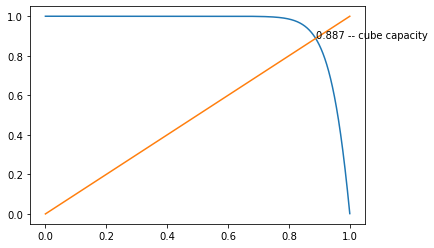

In [8]:
# smooth convex function 
f=[convex_func_smooth(x,10) for x in x]
plt.plot(x,f)
plt.plot(x,x)
idx = np.argwhere(np.diff(np.sign(f - x))).flatten()[0]
plt.annotate('%.5s -- cube capacity' %x[idx], xy=(x[idx], f[idx]))

plt.show()

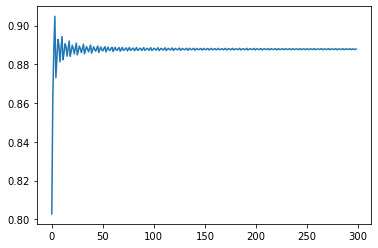

In [9]:
#computing Gutt-Hutchings capacity for smooth convex function
ghc=GH_capacities_convex(n_iter,x,f)
diff=[ghc[i]-ghc[i-1] for i in range(1,len(ghc))]
plt.plot(range(len(diff)),diff)


In [10]:
print("The spectral gap converges to : ", diff[-1]) 

The spectral gap converges to :  0.8879482413178721


We observe the "'spectral gap" converges to the cube capacity in this case. Conjecturely, we believe this is true for all convex smooth cases.

# Concave Toric Domains

In [11]:
from GH_capacities_concave import GH_capacities_concave
from concave_func import concave_func_lin,concave_func_smooth

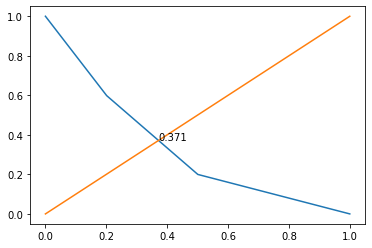

In [12]:
# piece-wise linear concave function
f=[concave_func_lin(x,[0.2,0.5],[0.6,0.2]) for x in x]
plt.plot(x,f)
plt.plot(x,x)
idx = np.argwhere(np.diff(np.sign(f - x))).flatten()[0]
plt.annotate('%.5s' %x[idx], xy=(x[idx], f[idx]))

plt.show()

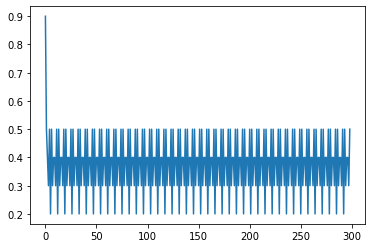

In [13]:
#computing Gutt-Hutchings capacity piece-wise linear concave function
ghc=GH_capacities_concave(n_iter,x,f)
diff=[ghc[i]-ghc[i-1] for i in range(1,len(ghc))]
plt.plot(range(len(diff)),diff)

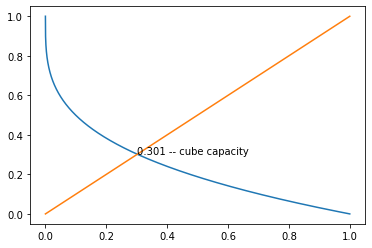

In [14]:
# smooth concave function 
f=[concave_func_smooth(x,0.3) for x in x]
plt.plot(x,f)
plt.plot(x,x)
idx = np.argwhere(np.diff(np.sign(f - x))).flatten()[0]
plt.annotate('%.5s -- cube capacity' %x[idx], xy=(x[idx], f[idx]))

plt.show()

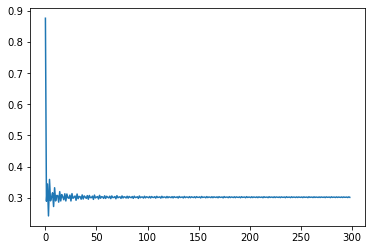

In [15]:
#computing Gutt-Hutchings capacity smooth concave function
ghc=GH_capacities_concave(n_iter,x,f)
diff=[ghc[i]-ghc[i-1] for i in range(1,len(ghc))]
plt.plot(range(len(diff)),diff)

In [16]:
print("The spectral gap converges to : ", diff[-1]) 

The spectral gap converges to :  0.3014822360409539


Again we observe here the "spectral gap" converges to the cube capacity. Our conjecture for convex cases also applies to the concave case